# **Predicting Survival in the Titanic Data Set**
We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.


In [1]:
# Loading Data and modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Importing the data

url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch,(Parents/children aboard), 
# and Fare to predict whether a passenger survived

X=titanic[['Pclass','Sex','Age','SibSp','Parch','Fare']]
y=titanic['Survived']

In [4]:
X.isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

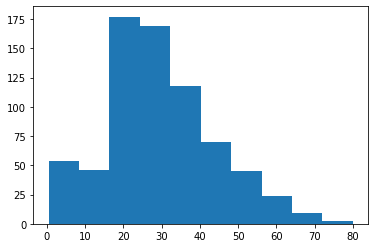

In [5]:
# Seeing the distribution of age to replace the null values

plt.hist(titanic.Age)

In [6]:
# Replacing null values of Age with Median

X['Age'].fillna(X['Age'].median(),inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [7]:
X.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [8]:
# We still have the Sex column which we need to convert to categorical


from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
X.Sex=lb.fit_transform(X.Sex)
X.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=400)

In [10]:
tree_clf=DecisionTreeClassifier()

In [11]:
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
tree_clf.score(x_train,y_train)

0.9789325842696629

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
grid_param={
    'max_depth':range(2,10),
    'max_leaf_nodes':range(2,15),
    'min_samples_split':range(2,15),
    'min_samples_leaf':range(2,15)
}

In [15]:
grid_search=GridSearchCV(estimator=tree_clf,param_grid=grid_param,cv=5)

In [16]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 10),
                         'max_leaf_nodes': range(2, 15),
                         'min_samples_leaf': range(2, 15),
                         'min_samples_split': range(2, 15)})

In [17]:
grid_search.best_score_


0.8117699202206244

In [18]:
grid_search.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 14,
 'min_samples_leaf': 4,
 'min_samples_split': 12}

In [20]:
clf=DecisionTreeClassifier(max_depth=5,max_leaf_nodes=14,min_samples_leaf=4,min_samples_split=12)

In [21]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=14, min_samples_leaf=4,
                       min_samples_split=12)

In [23]:
#Test score before tuning the hyperparameters
tree_clf.score(x_test,y_test)

0.8044692737430168

In [24]:
#Test score after tuning the hyperparameters
clf.score(x_test,y_test)

0.8715083798882681